In [1]:
import sys
sys.path.insert(0,'/home/jovyan/work/src/')
from sqlalchemy import create_engine, MetaData, select
from sqlalchemy.orm import sessionmaker
from arise.barcode.metadata.orm.barcode import Barcode
from arise.barcode.metadata.orm.marker import Marker
from arise.barcode.metadata.orm.nsr_species import NsrSpecies
from arise.barcode.metadata.orm.nsr_synonym import NsrSynonym
from arise.barcode.metadata.orm.nsr_node import NsrNode
from arise.barcode.metadata.orm.specimen import Specimen
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
from ete3 import Tree, TreeStyle
import os

os.environ['QT_QPA_PLATFORM']='offscreen'  # to avoid to kill the kernel using ete render
os.environ['XDG_RUNTIME_DIR']='/tmp/runtime-jovyan'

In [2]:
engine = create_engine('sqlite:////home/jovyan/work/data/sqlite/arise-barcode-metadata_old.db', echo=False)

# make session
Session = sessionmaker(engine)
session = Session()

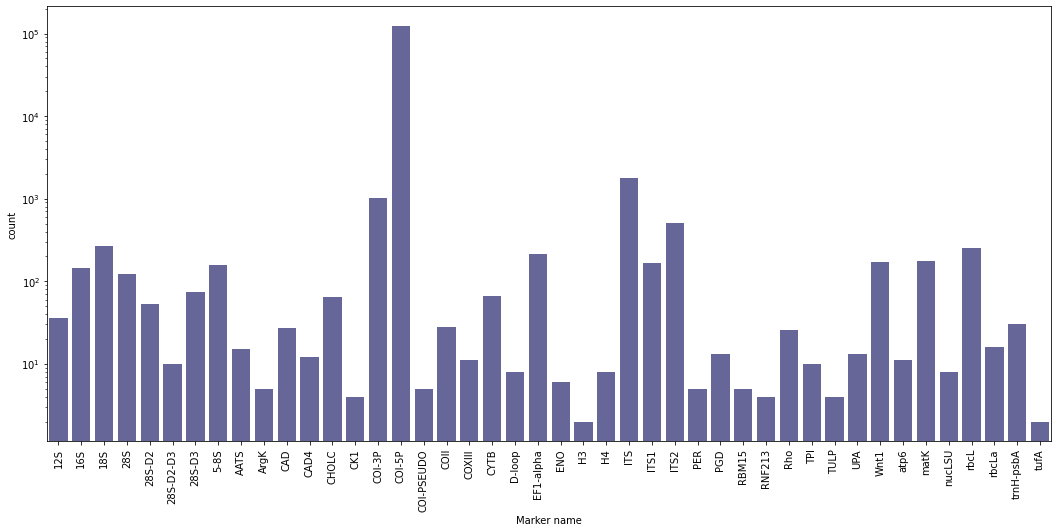

In [3]:
# with relationship()
# nsr_barcodes = session.query(Barcode).all()
# data = [el.marker.marker_name for el in nsr_barcodes]

# without?
markers = session.query(Barcode.marker_id, Marker.marker_name).join(Marker).all()
data = [el[1] for el in markers]
df = pd.DataFrame(data, columns=['Marker name']).sort_values(by=['Marker name'])
fig, ax = plt.subplots(figsize=(18,8))
sb.countplot(data=df, x='Marker name', ax=ax, color='b', saturation=0.2)
ax.set_yscale('log')
ax.tick_params(axis="x", rotation=90)

<AxesSubplot:xlabel='count', ylabel='Institution'>

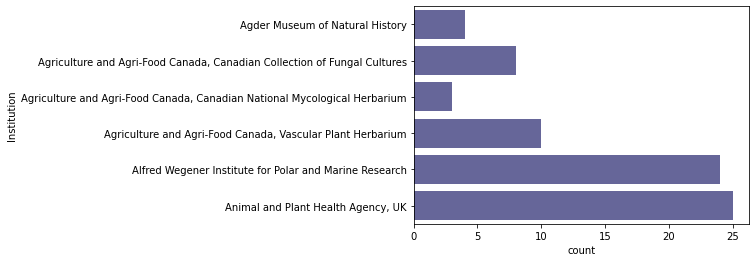

In [4]:
institutions = session.query(Specimen.institution_storing).limit(100).all()
institutions = [e[0] for e in institutions if e[0]]
df = pd.DataFrame(institutions, columns=['Institution']).sort_values(by=['Institution'])
sb.countplot(data=df, y='Institution', color='b', saturation=0.2)

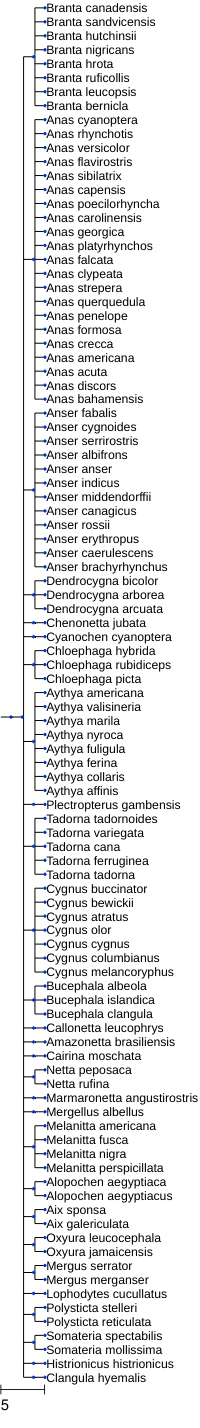

In [7]:
res = session.query(NsrNode).filter(NsrNode.id == 39).first()
# famillies = session.query(NsrNode).filter(NsrNode.rank == 'family').limit(10).all()
# famillies_count = session.query(NsrNode).filter(NsrNode.rank == 'family').count()
# print(famillies_count)

# for f in famillies:
#     print(f.id, f.get_descendants(session).count())

t = res.to_ete(session)
ts = TreeStyle()
ts.show_leaf_name = True
ts.draw_guiding_lines = False
ts.scale = 10
t.render(file_name='%%inline', w=200, tree_style=ts)